# **Predicting Loan Approval: A Classification Analysis**

**Source :**

https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data?select=loan_data.csv

In [ ]:
!pip install catboost lightgbm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
print('success load model name')

success load model name


# **Load & Describe Data**

## **Describe Data**

1. **person_age**: Usia peminjam yang mengajukan pinjaman.
2. **person_gender**: Jenis kelamin peminjam.
3. **person_education**: Tingkat pendidikan peminjam.
4. **person_income**: Penghasilan peminjam.
5. **person_emp_exp**: Pengalaman kerja peminjam.
6. **person_home_ownership**: Status kepemilikan rumah peminjam.
7. **loan_amnt**: Jumlah pinjaman yang diminta oleh peminjam
8. **loan_intent**: Tujuan peminjam dalam mengajukan pinjaman.
9. **loan_int_rate**: Tingkat suku bunga yang dikenakan pada pinjaman yang diajukan.
10. **loan_percent_income**: Persentase penghasilan peminjam yang digunakan untuk membayar pinjaman, atau yang terkait dengan pengajuan pinjaman.
11. **cb_person_cred_hist_length**: Lamanya individu memiliki riwayat kredit.
12. **credit_score**: Skor kredit peminjam yang menunjukkan tingkat kelayakan kreditnya berdasarkan riwayat keuangan.
13. **previous_loan_defaults_on_file**: Jumlah pinjaman yang gagal bayar yang tercatat dalam riwayat kredit peminjam.
14. **loan_status**: Status pinjaman (misalnya apakah pinjaman tersebut diterima atau ditolak).

## **Penentuan Goals**

**Goals yang ingin diperoleh dari dataset ini yaitu :**

1. Menganalisis apakah pinjaman yang di ajukan di setujui atau tidak.
2. Mengembangkan model klasifikasi yang akurat untuk memprediksi status persetujuan pinjaman.

## **Load Data**

In [ ]:
loan = pd.read_csv('/content/loan_data.csv')
print('Total Baris : ', loan.shape[0])
print('Total Kolom : ', loan.shape[1], '\n')
loan

Total Baris :  45000
Total Kolom :  14 



,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# **Data Cleaning**

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
# Check Missing Values

loan.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


**Tidak ada missing values**

In [ ]:
# Check Duplicated

loan.duplicated().sum()

0

**Tidak ada nilai yang duplikat**

# **Data Manipulation**

In [ ]:
loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
numeric = []
categoric = []
for col in loan.columns :
  if loan[col].dtypes in ['int64', 'float64']:
    numeric.append(col)
  elif loan[col].dtypes == 'object':
    categoric.append(col)
print('Numerical Column', numeric)
print('Categorical Column', categoric)

Numerical Column ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
Categorical Column ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


# **Exploratory Data Analysis (EDA)**

In [ ]:
numerical = loan[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']]
categorical = loan[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']]

In [ ]:
numerical.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
categorical.describe()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [ ]:
loan.groupby('person_gender')['loan_status'].value_counts()

person_gender  loan_status
female         0              15674
               1               4485
male           0              19326
               1               5515
Name: count, dtype: int64

**Notes:**

**1** : Approved

**0** : Rejected

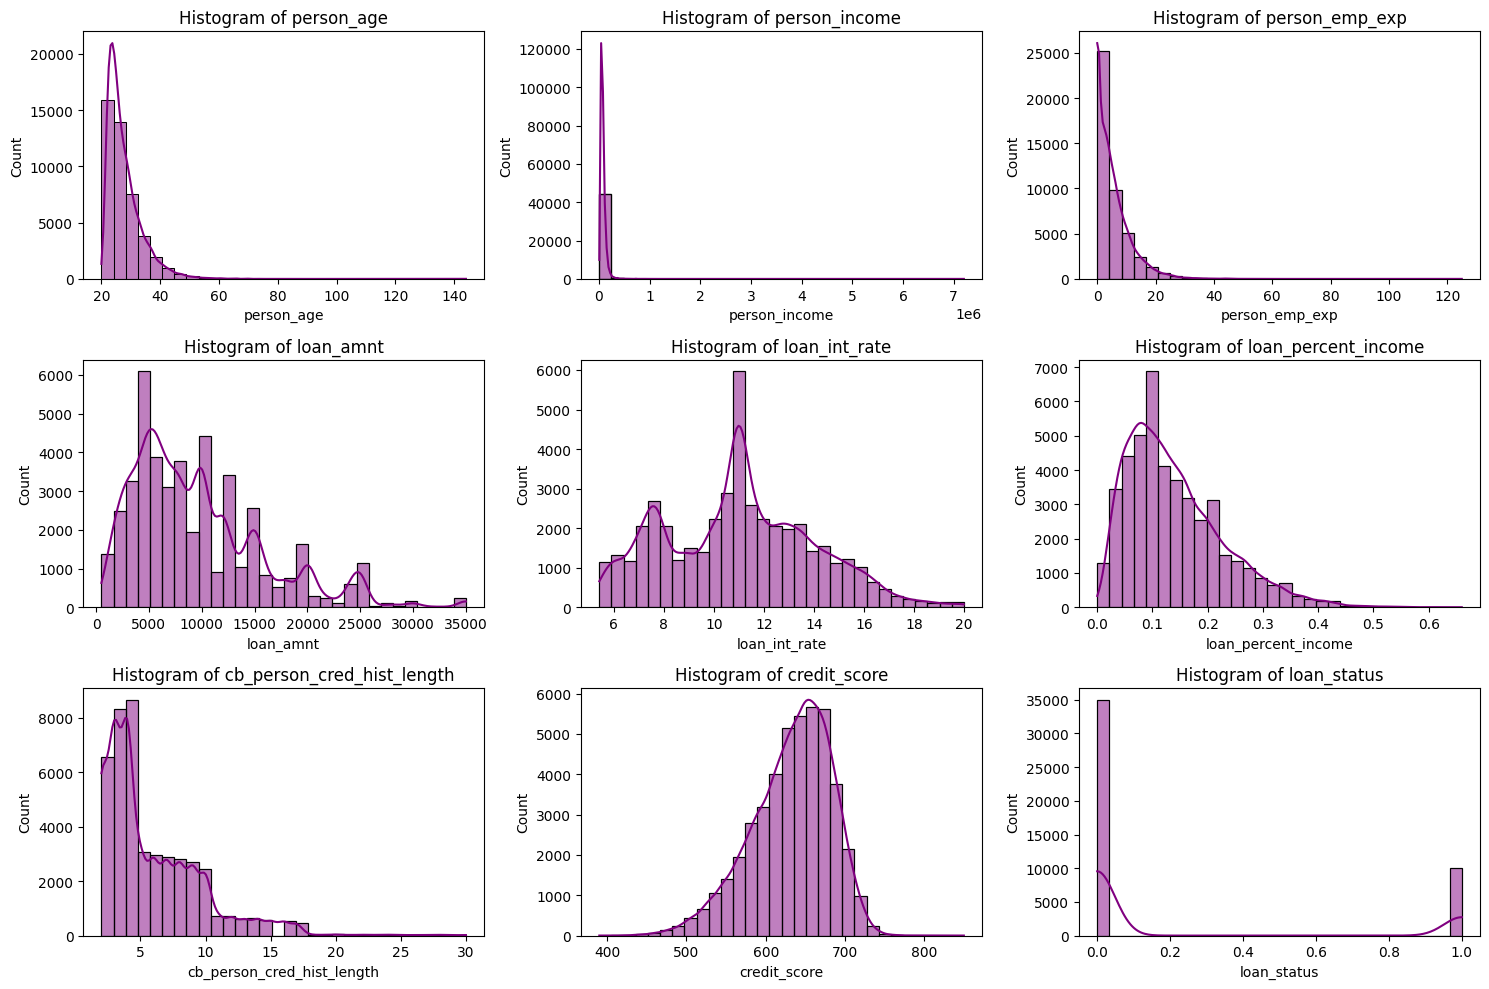

In [ ]:
# Memplot histogram untuk fitur numerical
def plot_numerical_features(loan):
    num_features = loan.columns
    plt.figure(figsize=(15, 10))

    for i, feature in enumerate(num_features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(loan[feature], kde=True, color='purple', bins=30)
        plt.title(f'Histogram of {feature}')
        plt.tight_layout()
    plt.show()

plot_numerical_features(numerical)

<ipython-input-71-7d42cd200240>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-71-7d42cd200240>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-71-7d42cd200240>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-71-7d42cd200240>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-71-7d42cd200240>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

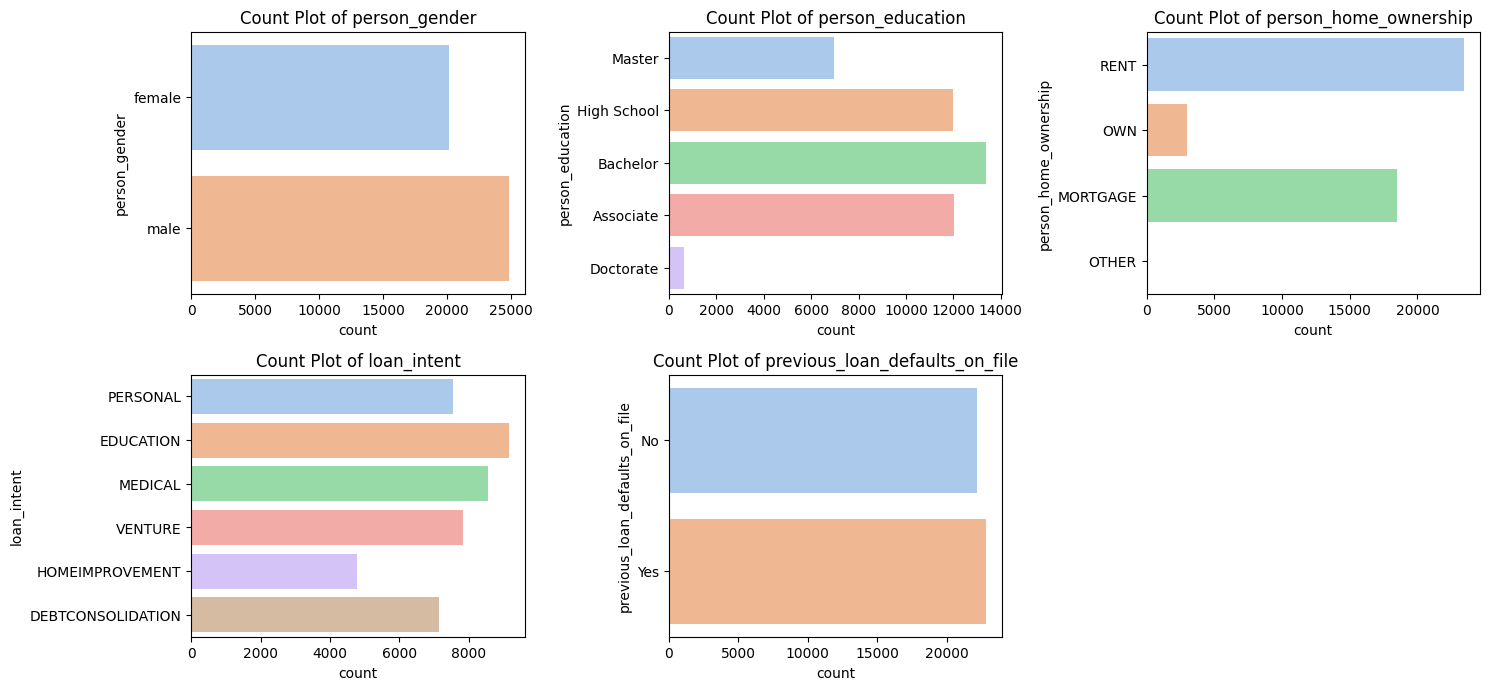

In [ ]:
# Memplot fitur categorical
def plot_categorical_features(loan):
    cat_features = loan.columns
    plt.figure(figsize=(15, 10))

    for i, feature in enumerate(cat_features, 1):
        plt.subplot(3, 3, i)
        sns.countplot(loan[feature], palette='pastel')
        plt.title(f'Count Plot of {feature}')
        plt.tight_layout()
    plt.show()
plot_categorical_features(categorical)

## **Multivariate**

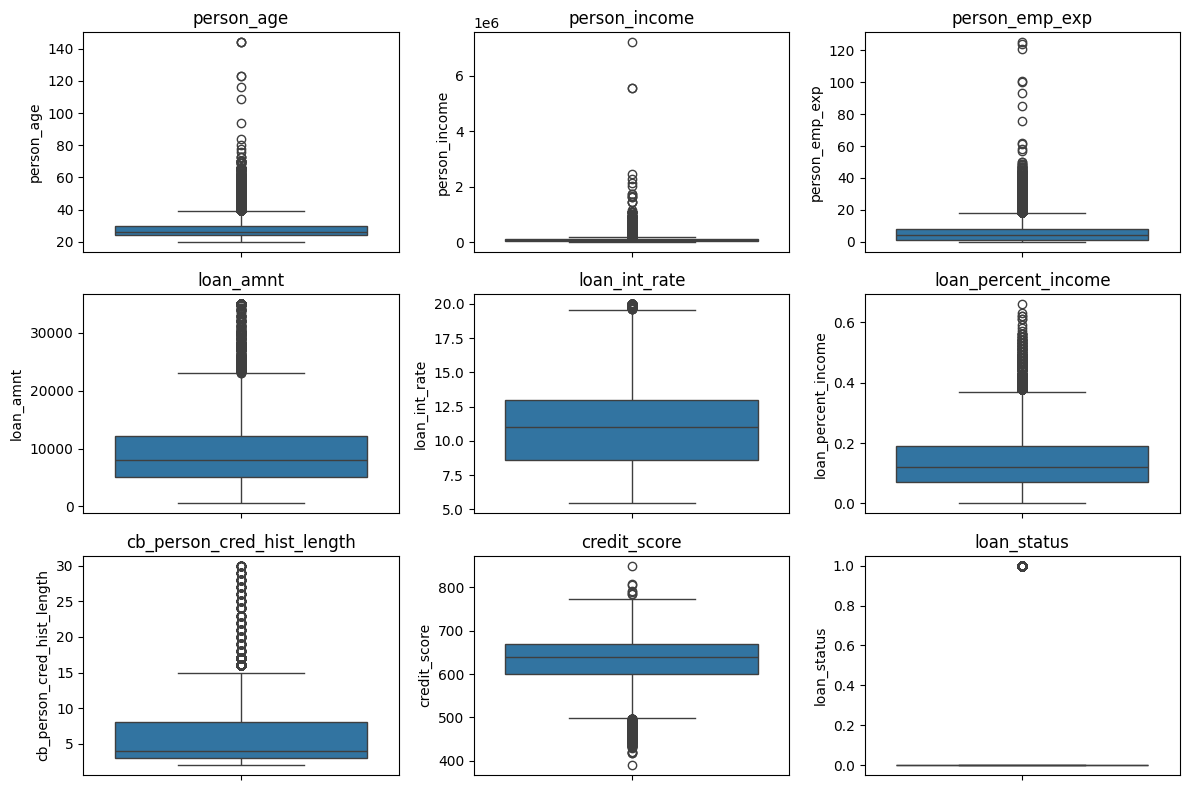

In [ ]:
 # Boxplot Outliers

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=numerical[column])
    plt.title(f'{column}')
    plt.tight_layout()

plt.show()

Pada box plot, terdapat outlier pada kolom person_age, person_income, person_emp_exp, loan_amount, loan_percent_income, cb_person_cred_hist_length, dan credit_score. Namun, setelah dilakukan handling terhadap outlier, ditemukan bahwa sejumlah data penting ikut terhapus. Oleh karena itu, keputusan diambil untuk tidak menghapus outlier dari dataset dah menghapus kolom person_age.

In [ ]:
# Menghitung IQR untuk setiap column numerical
Q1 = numerical.quantile(0.25)
Q3 = numerical.quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier: Menghapus baris yang memiliki nilai di luar rentang IQR (1,5 * IQR di bawah Q1 atau di atas Q3)
filtered_data = numerical[~((numerical < (Q1 - 1.5 * IQR)) | (numerical > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original data shape: {numerical.shape}")
print(f"Filtered data shape: {filtered_data.shape}")

Original data shape: (45000, 9)
Filtered data shape: (29562, 9)


In [ ]:
# Menentukan batas bawah dan atas
lower_bound = numerical.quantile(0.01)
upper_bound = numerical.quantile(0.99)

# Mengubah nilai yang lebih rendah dan nilai yang lebih tinggi
capped_data = numerical.clip(lower=lower_bound, upper=upper_bound, axis=1)

print(f"Capped data preview: {capped_data.head()}")

Capped data preview:    person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        22.0       71948.00               0   28390.34          16.02   
1        21.0       17875.95               0    1138.87          11.14   
2        25.0       17875.95               3    5500.00          12.87   
3        23.0       79753.00               0   28390.34          15.23   
4        24.0       66135.00               1   28390.34          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  
0                 0.40                         3.0           561            1  
1                 0.08                         2.0           504            0  
2                 0.40                         3.0           635            1  
3                 0.40                         2.0           675            1  
4                 0.40                         4.0           586            1  


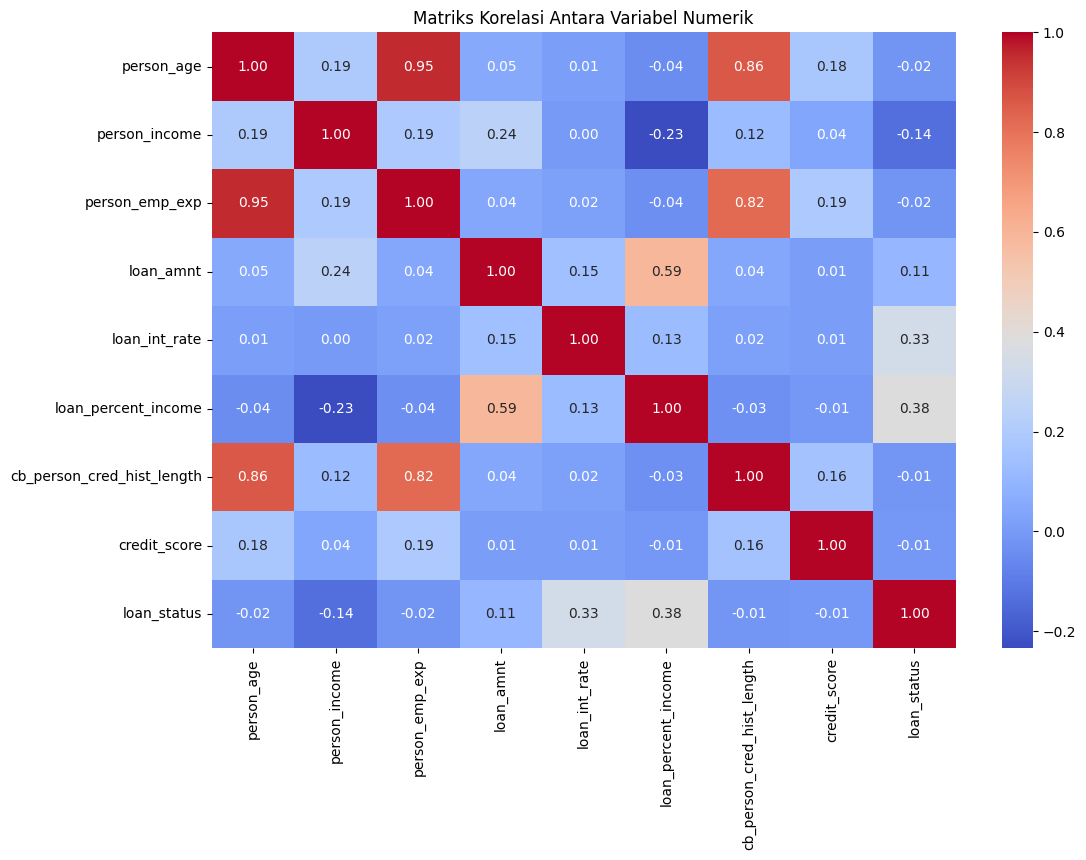

In [ ]:
# Correlation Heatmap
correlation_matrix = numerical.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antara Variabel Numerik')
plt.show()

Pada correlation heatmap, kolom person_emp_exp memiliki korelasi yang kuat sehingga nilai pada kolom person_emp_exp di drop untuk menghindari masalah multikolinearitas.

In [ ]:
loan.drop(['person_age', 'person_emp_exp'], axis=1, inplace=True)

In [ ]:
loan.head()

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,female,Master,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,female,High School,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,female,High School,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,female,Bachelor,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,male,Master,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## **Binary Analysis**

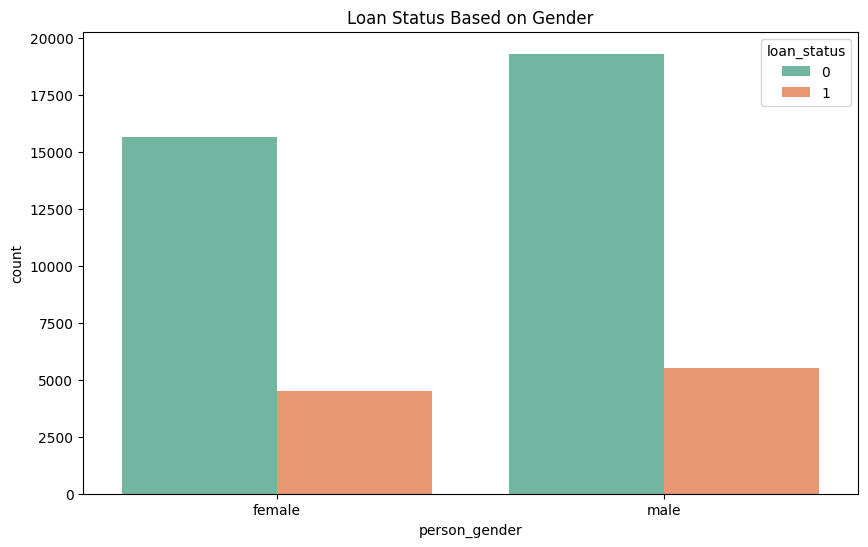

In [ ]:
# Visualisasi jenis kelamin berdasarkan status pinjaman
plt.figure(figsize=(10, 6))
sns.countplot(data=loan, x='person_gender', hue='loan_status', palette='Set2')
plt.title('Loan Status Based on Gender')
plt.show()

Berdasarkan status pinjaman menurut gender peminjam, jumlah pinjaman yang ditolak lebih banyak dibandingkan dengan yang disetujui, baik untuk peminjam laki-laki maupun perempuan.

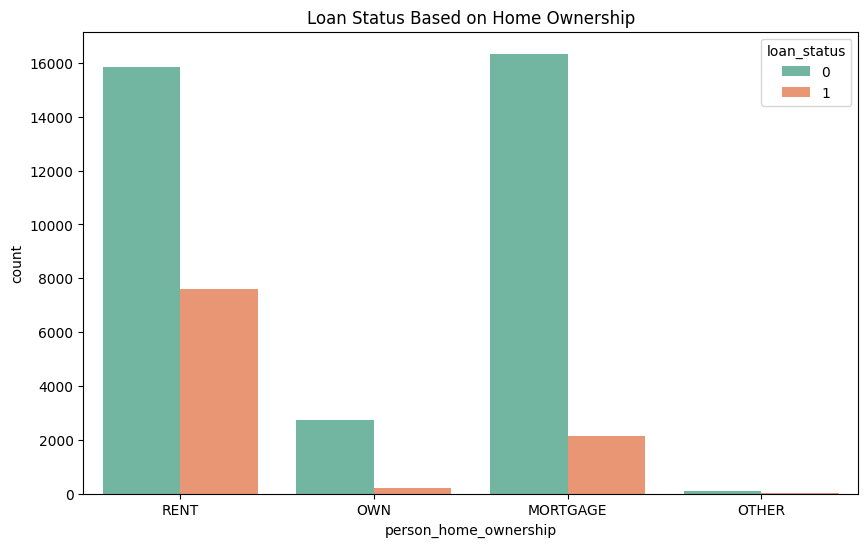

In [ ]:
# Visualisasi status kepemilikan rumah berdasarkan status pinjaman
plt.figure(figsize=(10, 6))
sns.countplot(data=loan, x='person_home_ownership', hue='loan_status', palette='Set2')
plt.title('Loan Status Based on Home Ownership')
plt.show()

Berdasarkan status kepemilikan rumah, jumlah pinjaman yang ditolak lebih banyak dibandingkan dengan yang disetujui. Namun, untuk peminjam dengan status kepemilikan rumah 'rent', pinjaman yang disetujui lebih banyak dibandingkan dengan peminjam yang memiliki status 'own' atau 'mortgage'.

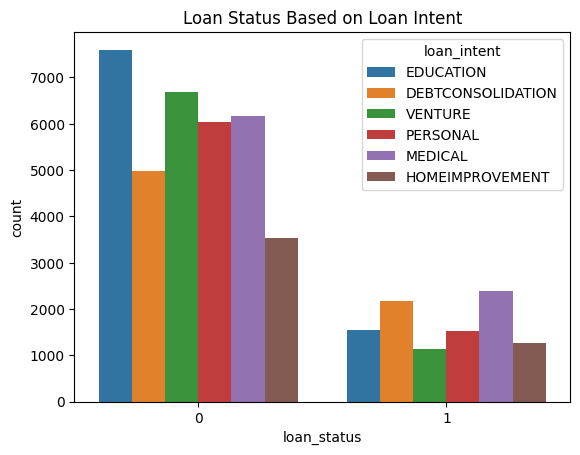

In [ ]:
# Visulisasi loan_status berdasarkan tujuan pinjaman
sns.countplot(x='loan_status', hue='loan_intent', data=loan)
plt.title('Loan Status Based on Loan Intent')
plt.show()

Berdasarkan tujuan pinjaman, pinjaman yang disetujui lebih banyak diajukan untuk keperluan medis, sementara pinjaman yang ditolak lebih banyak diajukan untuk keperluan pendidikan.

# **Feature Engineering**

In [ ]:
Numerics = loan[['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']]
Categorics = loan[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']]

In [ ]:
loan['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
0,0.777778
1,0.222222


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(loan, test_size = 0.2, random_state=42)

In [ ]:
len(train.drop_duplicates()) / len(train)

1.0

In [ ]:
len(test.drop_duplicates()) / len(test)

1.0

Output yang keluar bernilai 1 sehingga tidak ada nilai yang terduplikat

In [ ]:
# Missing Values Check
train.isna().sum()

,0
person_gender,0
person_education,0
person_income,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0
cb_person_cred_hist_length,0
credit_score,0


In [ ]:
# Missing Values Check
train.isnull().sum()

,0
person_gender,0
person_education,0
person_income,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0
cb_person_cred_hist_length,0
credit_score,0


In [ ]:
for col in loan.columns :
  print (f'======={col}=======')
  print(loan[col].value_counts())
  display()

=======person_gender=======
person_gender
male      24841
female    20159
Name: count, dtype: int64
=======person_education=======
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64
=======person_income=======
person_income
8000.0      15
73011.0     10
36995.0      9
60914.0      8
37020.0      8
            ..
259923.0     1
40186.0      1
69485.0      1
50351.0      1
33164.0      1
Name: count, Length: 33989, dtype: int64
=======person_home_ownership=======
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64
=======loan_amnt=======
loan_amnt
10000.0    3617
5000.0     2787
6000.0     2426
12000.0    2416
15000.0    2004
           ... 
9135.0        1
8389.0        1
7583.0        1
13069.0       1
6665.0        1
Name: count, Length: 4483, dtype: int64
=======loan_intent=======
loan_intent
EDUCATION            9153
MED

Tidak ada nilai yang hilang

## **Standar Scaller**

In [ ]:
train.describe()

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,3.600000e+04,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,8.064919e+04,9581.782333,11.002141,0.139636,5.848167,632.630556,0.221944
std,8.555051e+04,6307.493183,2.989880,0.087058,3.859134,50.258196,0.415560
min,8.000000e+03,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,4.722975e+04,5000.000000,8.580000,0.070000,3.000000,602.000000,0.000000
50%,6.709200e+04,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,9.575725e+04,12250.000000,13.030000,0.190000,8.000000,670.000000,0.000000
max,7.200766e+06,35000.000000,20.000000,0.630000,30.000000,850.000000,1.000000


In [ ]:
train.columns

Index(['person_gender', 'person_education', 'person_income',
       'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
columns_to_stdscaller = ['person_income', 'loan_amnt', 'loan_int_rate',
                         'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
scaler = StandardScaler()

In [ ]:
# Menerapkan standarisasi ke data pelatihan (train)
train[columns_to_stdscaller] = scaler.fit_transform(train[columns_to_stdscaller])

# Menerapkan standarisasi yang sama ke data uji (test)
test[columns_to_stdscaller] = scaler.transform(test[columns_to_stdscaller])

## **Encoding**

In [ ]:
for col in categorical:
  print(f'======={col}=======')
  print(train[col].value_counts())
  display()

=======person_gender=======
person_gender
male      19817
female    16183
Name: count, dtype: int64
=======person_education=======
person_education
Bachelor       10772
Associate       9607
High School     9508
Master          5609
Doctorate        504
Name: count, dtype: int64
=======person_home_ownership=======
person_home_ownership
RENT        18727
MORTGAGE    14795
OWN          2379
OTHER          99
Name: count, dtype: int64
=======loan_intent=======
loan_intent
EDUCATION            7381
MEDICAL              6818
VENTURE              6227
PERSONAL             6030
DEBTCONSOLIDATION    5731
HOMEIMPROVEMENT      3813
Name: count, dtype: int64
=======previous_loan_defaults_on_file=======
previous_loan_defaults_on_file
Yes    18253
No     17747
Name: count, dtype: int64


**Notes Encoding :**

1. One-Hot Encoding (OHE) : person_gender
2. Label Encoding : previous_loan_defaults_on_file, person_education
3. Mean Encoding : person_home_ownership, loan_intent

## **One-Hot Encoding (OHE)**

In [ ]:
# Melakukan one-hot encoding pada kolom 'person_gender'
encode_ohe = ['person_gender']
# Buat list nama-nama kolom yang ingin dilakukan OHE
train = pd.get_dummies(train, columns=encode_ohe)
test = pd.get_dummies(test, columns=encode_ohe)

## **Label Encoding**

In [ ]:
columns_to_encode = ['previous_loan_defaults_on_file']
label_encoder = LabelEncoder()

In [ ]:
train.head()

,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_gender_female,person_gender_male
25180,Bachelor,0.194225,MORTGAGE,0.859025,PERSONAL,0.577910,0.119054,0.816732,-0.032444,No,0,True,False
12555,High School,-0.089962,RENT,0.383393,VENTURE,0.286925,0.233921,-0.478914,0.524687,Yes,0,False,True
29153,Master,2.828167,MORTGAGE,2.285919,PERSONAL,-0.211430,-0.799885,1.334990,1.002227,Yes,0,True,False
23838,Associate,0.158772,RENT,0.002888,EDUCATION,2.052907,-0.455283,0.298474,0.166531,No,0,False,True
35686,Master,0.049373,RENT,-0.399971,HOMEIMPROVEMENT,0.658182,-0.685018,-0.738043,1.459871,Yes,0,False,True


In [ ]:
# Menerapkan label encoding ke data pelatihan (Train)
for col in columns_to_encode:
  train[col] = label_encoder.fit_transform(train[col])

# Menerapkan label encoding yang sama ke data uji (Test)
for col in columns_to_encode:
  test[col] = label_encoder.transform(test[col])

In [ ]:
# Label Encoding : 'person_education'

train['person_education'] = train['person_education'].replace(
    {
        'High School':1,
        'Bachelor':2,
        'Associate':3,
        'Master':4,
        'Doctorate':5
    }
)

test['person_education'] = test['person_education'].replace(
    {
        'High School':1,
        'Bachelor':2,
        'Associate':3,
        'Master':4,
        'Doctorate':5
    }
)

<ipython-input-98-2f0bf6346d58>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-98-2f0bf6346d58>:13: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
train.head()

,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_gender_female,person_gender_male
25180,2,0.194225,MORTGAGE,0.859025,PERSONAL,0.577910,0.119054,0.816732,-0.032444,0,0,True,False
12555,1,-0.089962,RENT,0.383393,VENTURE,0.286925,0.233921,-0.478914,0.524687,1,0,False,True
29153,4,2.828167,MORTGAGE,2.285919,PERSONAL,-0.211430,-0.799885,1.334990,1.002227,1,0,True,False
23838,3,0.158772,RENT,0.002888,EDUCATION,2.052907,-0.455283,0.298474,0.166531,0,0,False,True
35686,4,0.049373,RENT,-0.399971,HOMEIMPROVEMENT,0.658182,-0.685018,-0.738043,1.459871,1,0,False,True


## **Mean Encoding**

In [ ]:
mean_encode_columns = ['person_home_ownership', 'loan_intent']
for col in mean_encode_columns:
  dict_mean_encoding = train.groupby([col])['loan_status'].mean().to_dict()\

  train[col] = train[col].map(dict_mean_encoding)
  test[col] = test[col].map(dict_mean_encoding)

In [ ]:
train.head()

,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_gender_female,person_gender_male
25180,2,0.194225,0.115174,0.859025,0.201493,0.577910,0.119054,0.816732,-0.032444,0,0,True,False
12555,1,-0.089962,0.324451,0.383393,0.142444,0.286925,0.233921,-0.478914,0.524687,1,0,False,True
29153,4,2.828167,0.115174,2.285919,0.201493,-0.211430,-0.799885,1.334990,1.002227,1,0,True,False
23838,3,0.158772,0.324451,0.002888,0.170573,2.052907,-0.455283,0.298474,0.166531,0,0,False,True
35686,4,0.049373,0.324451,-0.399971,0.263310,0.658182,-0.685018,-0.738043,1.459871,1,0,False,True


In [ ]:
train.columns

Index(['person_education', 'person_income', 'person_home_ownership',
       'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status', 'person_gender_female',
       'person_gender_male'],
      dtype='object')

In [ ]:
# Pisahkan fitur dan target
y_train = train['loan_status']
y_test = test['loan_status']
X_train = train.drop(columns=['loan_status'])
X_test = test.drop(columns=['loan_status'])

# **Machine Learning : Baseline Model**

In [ ]:
Numerics = loan[['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']]
Categorics = loan[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']]

In [ ]:
train['loan_status'].value_counts()

,count
loan_status,
0,28010
1,7990


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[02:57:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1104
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371


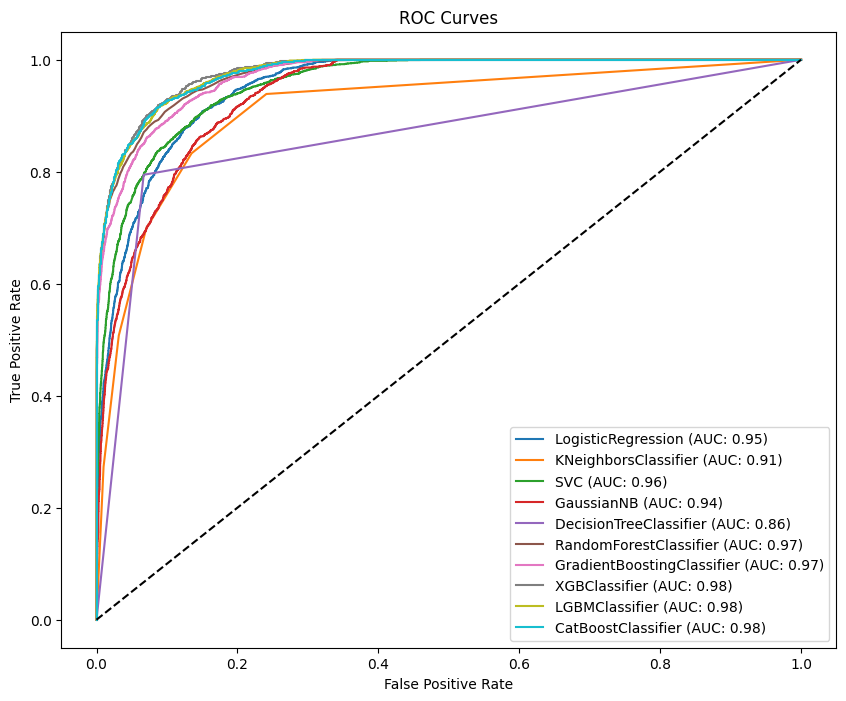

In [ ]:
# Models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]) if hasattr(model, 'predict_proba') else None
    test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, 'predict_proba') else None

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Plot ROC Curve
    if hasattr(model, 'predict_proba'):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC: {test_auc:.2f})")

models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(probability=True),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    LGBMClassifier(),
    CatBoostClassifier(verbose=0)
]

plt.figure(figsize=(10, 8))
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="best")
plt.show()

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Prepare dictionary to store evaluation results
    results = {
        'Model': model.__class__.__name__,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
        'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
        'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'Train F1 Score': f1_score(y_train, y_train_pred, average='weighted'),
        'Test F1 Score': f1_score(y_test, y_test_pred, average='weighted'),
        'Train Confusion Matrix': confusion_matrix(y_train, y_train_pred),
        'Test Confusion Matrix': confusion_matrix(y_test, y_test_pred),
    }

    # Calculate ROC-AUC if the model supports predict_proba
    if hasattr(model, 'predict_proba'):
        train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
        test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        results['Train ROC-AUC'] = train_auc
        results['Test ROC-AUC'] = test_auc
    else:
        results['Train ROC-AUC'] = None
        results['Test ROC-AUC'] = None

    # Convert results dictionary to DataFrame
    results_df = pd.DataFrame([results])

    return results_df

# List of models to evaluate
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(probability=True),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    LGBMClassifier(),
    CatBoostClassifier(verbose=0)
]

# List to store results from all models
all_results = []

# Loop over all models and evaluate them
for model in models:
    result = evaluate_model(model, X_train, X_test, y_train, y_test)
    all_results.append(result)

# Concatenate all results into a single DataFrame
final_results_df = pd.concat(all_results, ignore_index=True)

# Show the result DataFrame
final_results_df

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[03:01:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1104
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train Confusion Matrix,Test Confusion Matrix,Train ROC-AUC,Test ROC-AUC
0,LogisticRegression,0.895472,0.893222,0.894046,0.891771,0.895472,0.893222,0.894654,0.892392,"[[26298, 1712], [2051, 5939]]","[[6552, 438], [523, 1487]]",0.953444,0.951934
1,KNeighborsClassifier,0.917611,0.877889,0.916198,0.875663,0.917611,0.877889,0.916673,0.876589,"[[26770, 1240], [1726, 6264]]","[[6498, 492], [607, 1403]]",0.970204,0.912304
2,SVC,0.909472,0.905444,0.907537,0.903304,0.909472,0.905444,0.908120,0.903934,"[[26695, 1315], [1944, 6046]]","[[6649, 341], [510, 1500]]",0.959013,0.955755
3,GaussianNB,0.731417,0.737444,0.876826,0.878119,0.731417,0.737444,0.754044,0.759349,"[[18379, 9631], [38, 7952]]","[[4634, 2356], [7, 2003]]",0.942883,0.939961
4,DecisionTreeClassifier,1.000000,0.901889,1.000000,0.902912,1.000000,0.901889,1.000000,0.902357,"[[28010, 0], [0, 7990]]","[[6521, 469], [414, 1596]]",1.000000,0.863467
5,RandomForestClassifier,1.000000,0.928222,1.000000,0.926825,1.000000,0.928222,1.000000,0.926442,"[[28010, 0], [0, 7990]]","[[6794, 196], [450, 1560]]",1.000000,0.973661
6,GradientBoostingClassifier,0.926611,0.920556,0.925161,0.918759,0.926611,0.920556,0.924593,0.918422,"[[27242, 768], [1874, 6116]]","[[6769, 221], [494, 1516]]",0.973654,0.970813
7,XGBClassifier,0.966000,0.933222,0.965882,0.932002,0.966000,0.933222,0.965476,0.932020,"[[27722, 288], [936, 7054]]","[[6784, 206], [395, 1615]]",0.994299,0.978367
8,LGBMClassifier,0.947278,0.932000,0.946684,0.930730,0.947278,0.932000,0.946171,0.930587,"[[27493, 517], [1381, 6609]]","[[6792, 198], [414, 1596]]",0.987117,0.977117
9,CatBoostClassifier,0.953028,0.933556,0.952696,0.932388,0.953028,0.933556,0.952043,0.932049,"[[27596, 414], [1277, 6713]]","[[6808, 182], [416, 1594]]",0.988564,0.976869


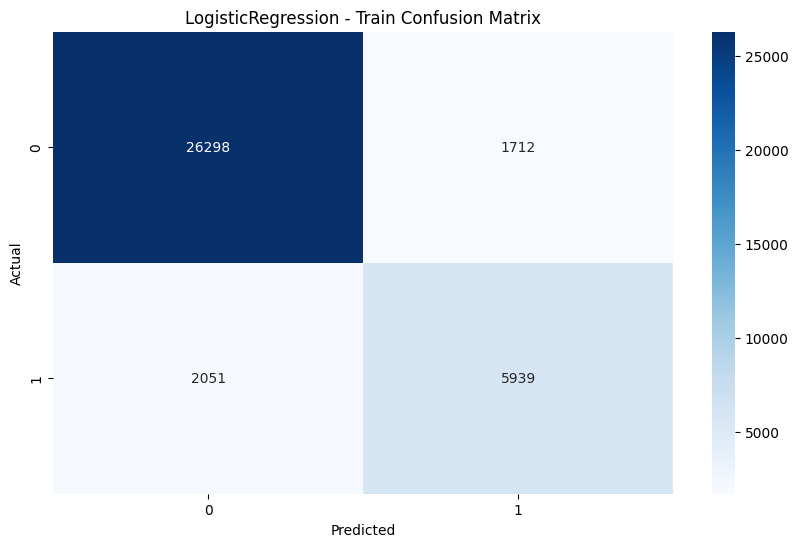

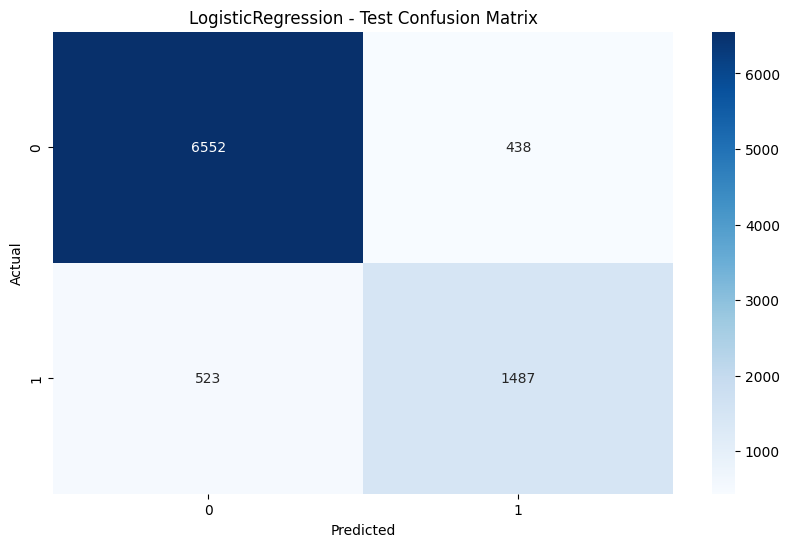

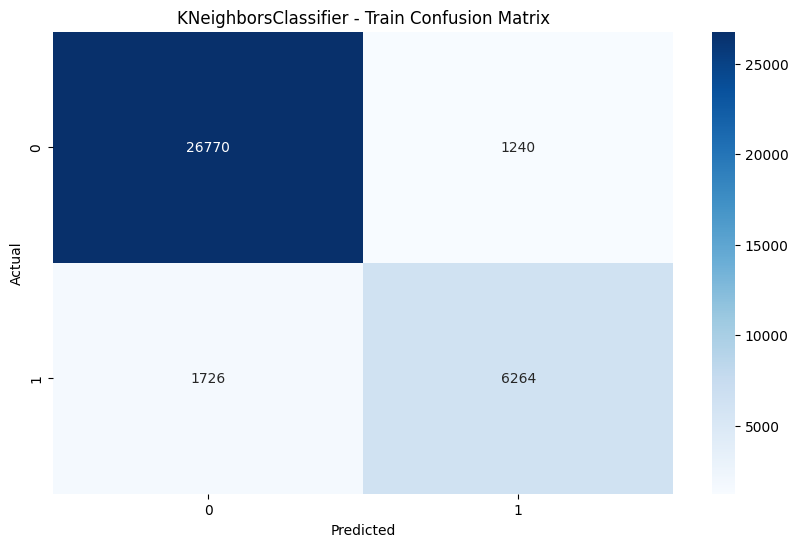

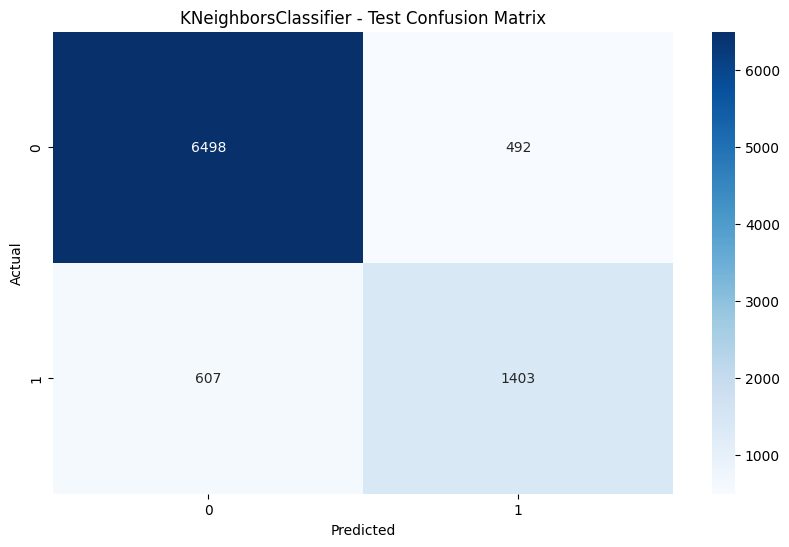

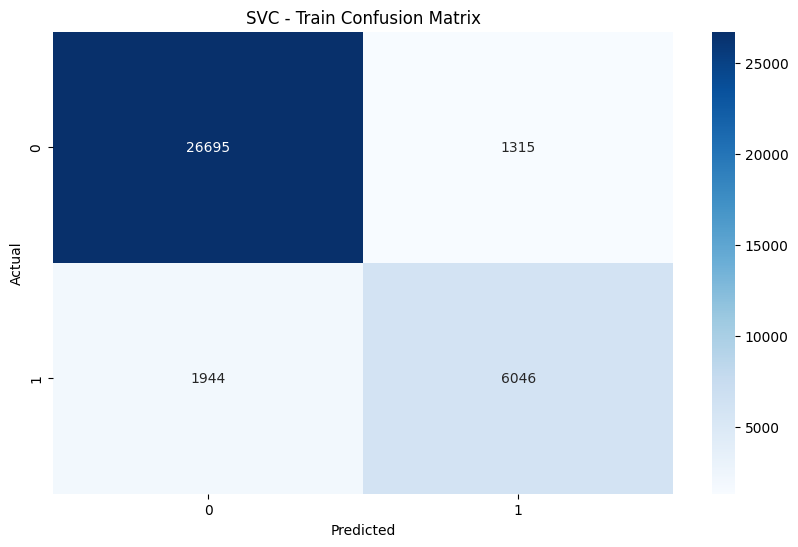

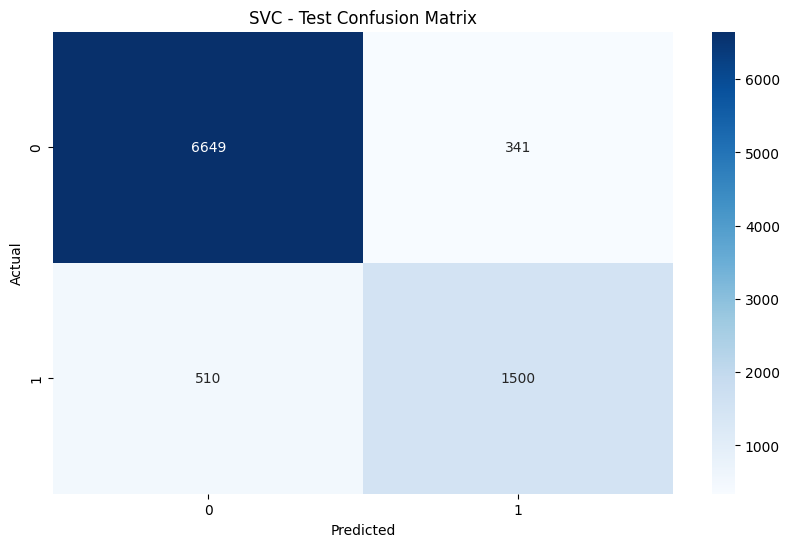

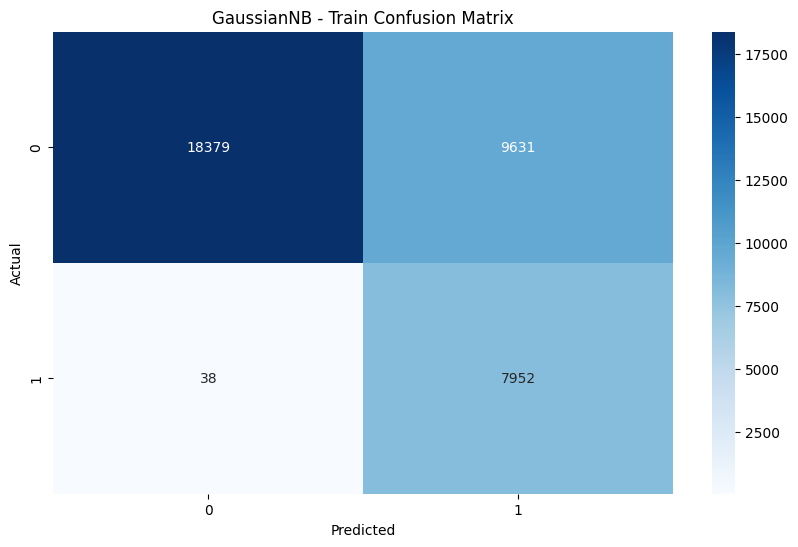

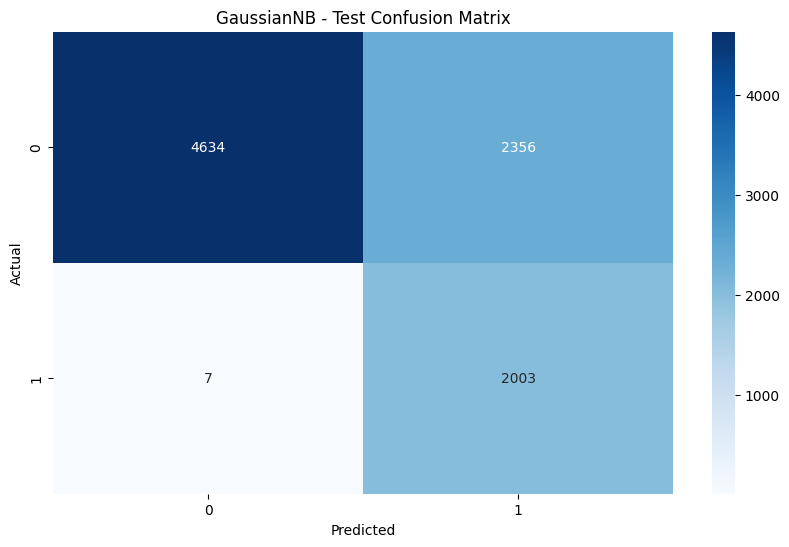

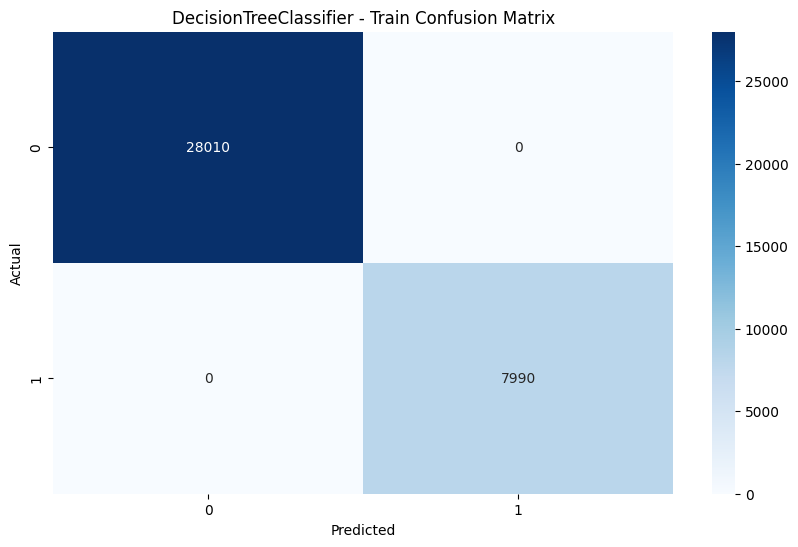

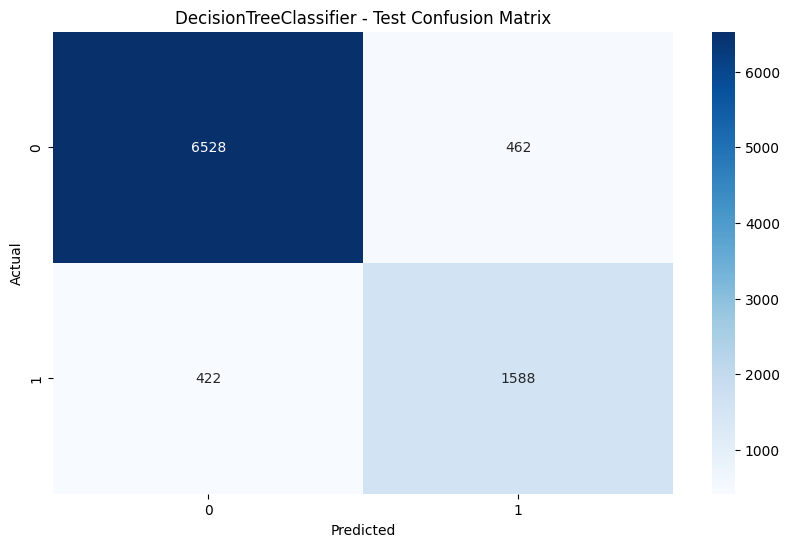

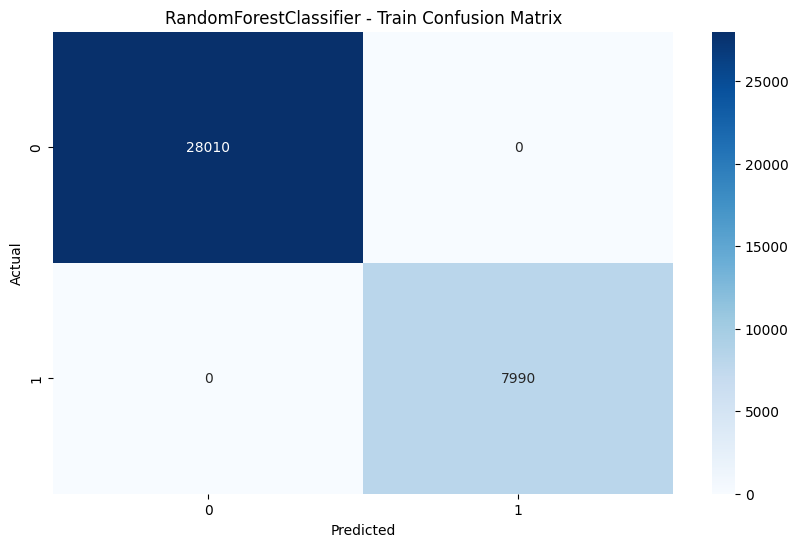

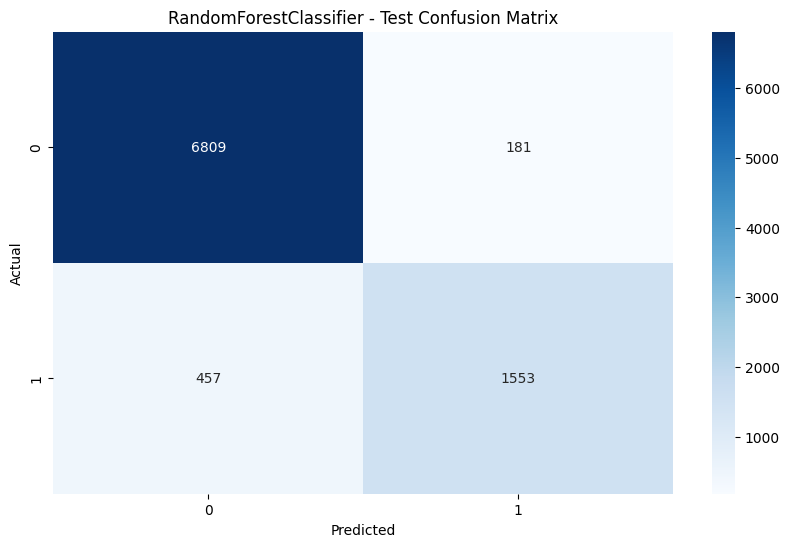

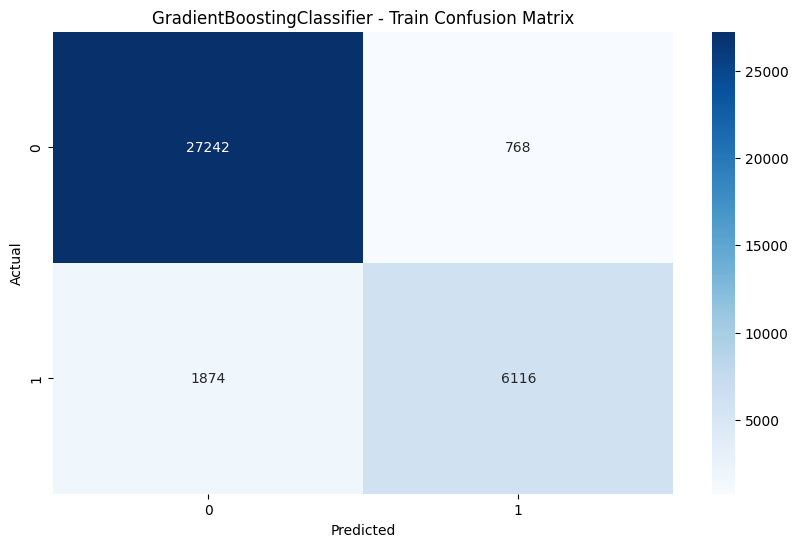

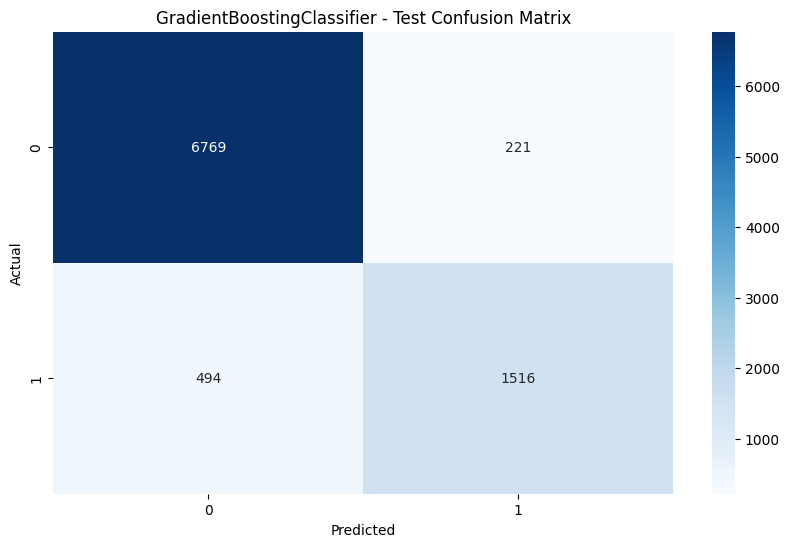

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[03:05:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




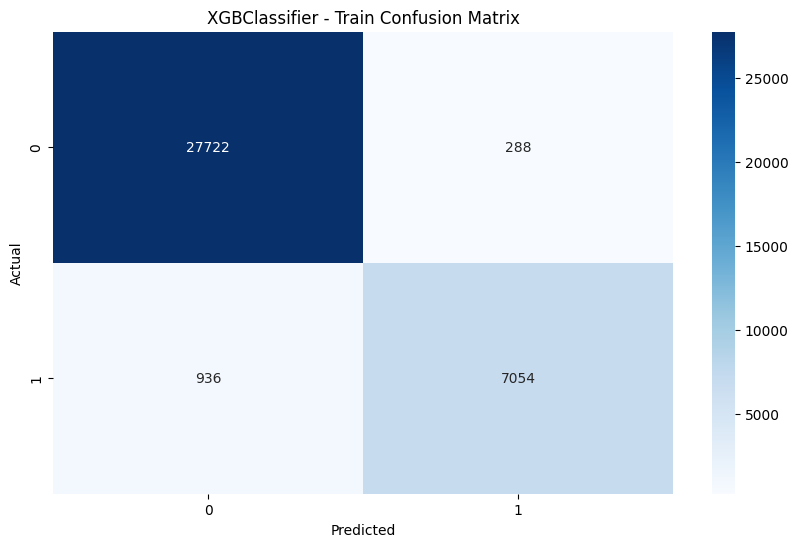

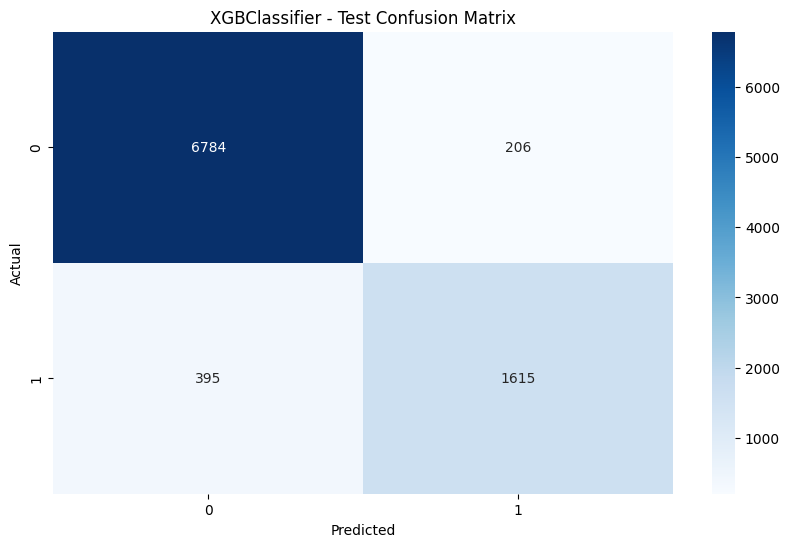

[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1104
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371


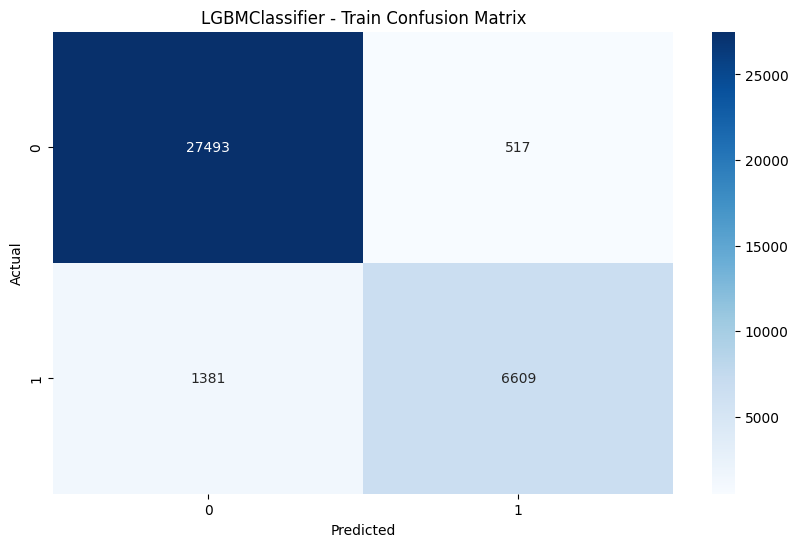

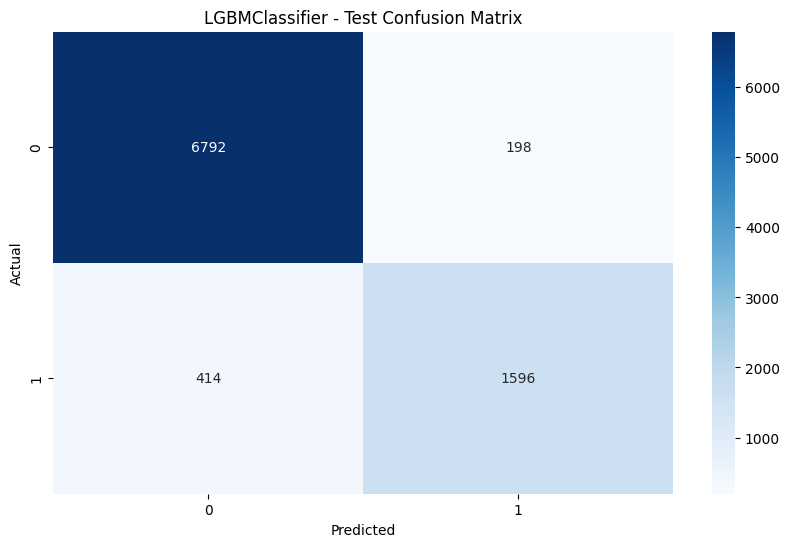

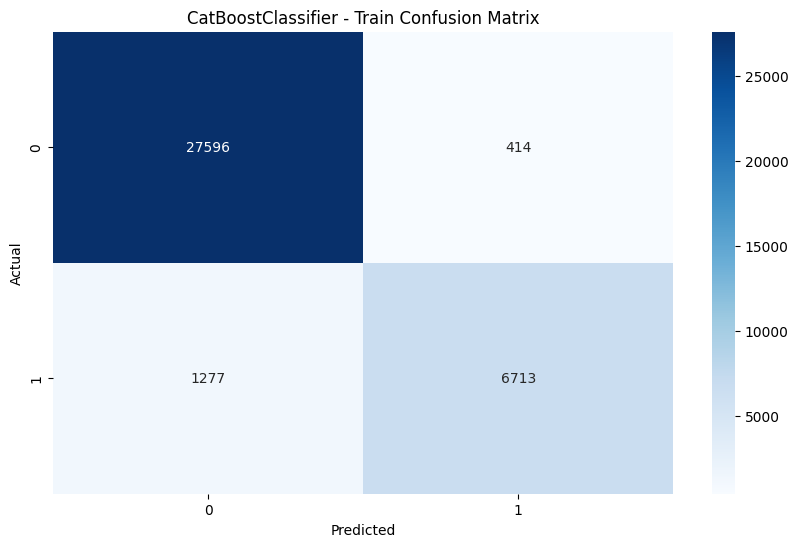

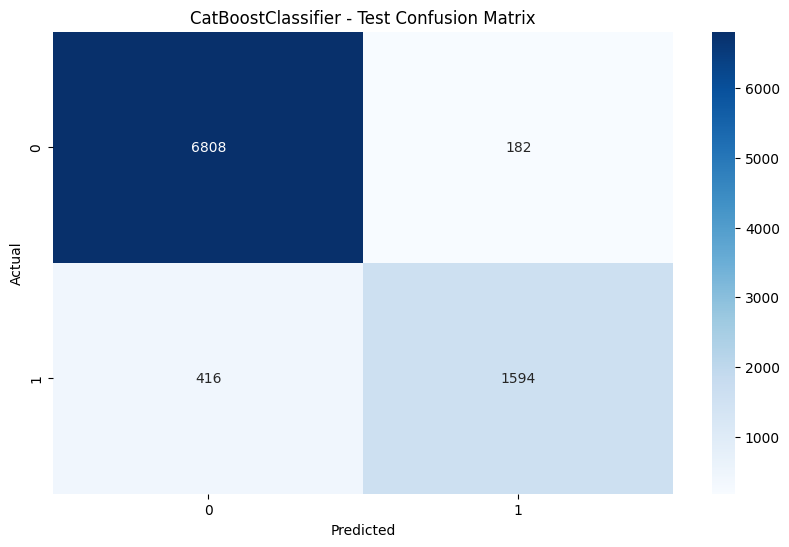

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # Train Confusion Matrix
    train_cm = confusion_matrix(y_train, y_train_pred)

    # Test Confusion Matrix
    test_cm = confusion_matrix(y_test, y_test_pred)

    # Plot Confusion Matrix (Train)
    plt.figure(figsize=(10, 6))
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'{model.__class__.__name__} - Train Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot Confusion Matrix (Test)
    plt.figure(figsize=(10, 6))
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'{model.__class__.__name__} - Test Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Metrics calculation
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]) if hasattr(model, 'predict_proba') else None
    test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, 'predict_proba') else None

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')


# List of models to evaluate
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(probability=True),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    LGBMClassifier(),
    CatBoostClassifier(verbose=0)
]

# Plot Confusion Matrix for all models
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)

# **Handling Imbalance Data**

person_gender                       int64
person_education                    int64
person_income                     float64
person_home_ownership               int64
loan_amnt                         float64
loan_intent                         int64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int64
loan_status                         int64
dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



Model: CatBoostClassifier | Sampling: undersampling
Train Confusion Matrix:
[[6526  467]
 [ 267 6726]]
Test Confusion Matrix:
[[9244 1249]
 [ 208 2799]]
Train Accuracy: 0.9475189475189475
Test Accuracy: 0.892074074074074
Train Precision: 0.9478853005120598
Test Precision: 0.9141696079933698
Train Recall: 0.9475189475189475
Test Recall: 0.892074074074074
Train F1 Score: 0.9475082134520483
Test F1 Score: 0.8972200574126556
Train ROC-AUC: 0.9916169974800033
Test ROC-AUC: 0.9742015604429589




/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



Model: CatBoostClassifier | Sampling: oversampling
Train Confusion Matrix:
[[23108  1399]
 [  605 23902]]
Test Confusion Matrix:
[[9598  895]
 [ 280 2727]]
Train Accuracy: 0.9591137226098666
Test Accuracy: 0.912962962962963
Train Precision: 0.9595961557024554
Test Precision: 0.9229284790032398
Train Recall: 0.9591137226098666
Test Recall: 0.912962962962963
Train F1 Score: 0.9591029903231562
Test F1 Score: 0.915686534548571
Train ROC-AUC: 0.9934190597001065
Test ROC-AUC: 0.9766948374311714




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



Model: CatBoostClassifier | Sampling: over-undersampling
Train Confusion Matrix:
[[24012   495]
 [  971 23536]]
Test Confusion Matrix:
[[10099   394]
 [  548  2459]]
Train Accuracy: 0.9700901783163994
Test Accuracy: 0.9302222222222222
Train Precision: 0.9702675885433729
Test Precision: 0.9292339945517977
Train Recall: 0.9700901783163994
Test Recall: 0.9302222222222222
Train F1 Score: 0.9700873571519781
Test F1 Score: 0.9295595044539373
Train ROC-AUC: 0.9967963232288426
Test ROC-AUC: 0.9758512579577415




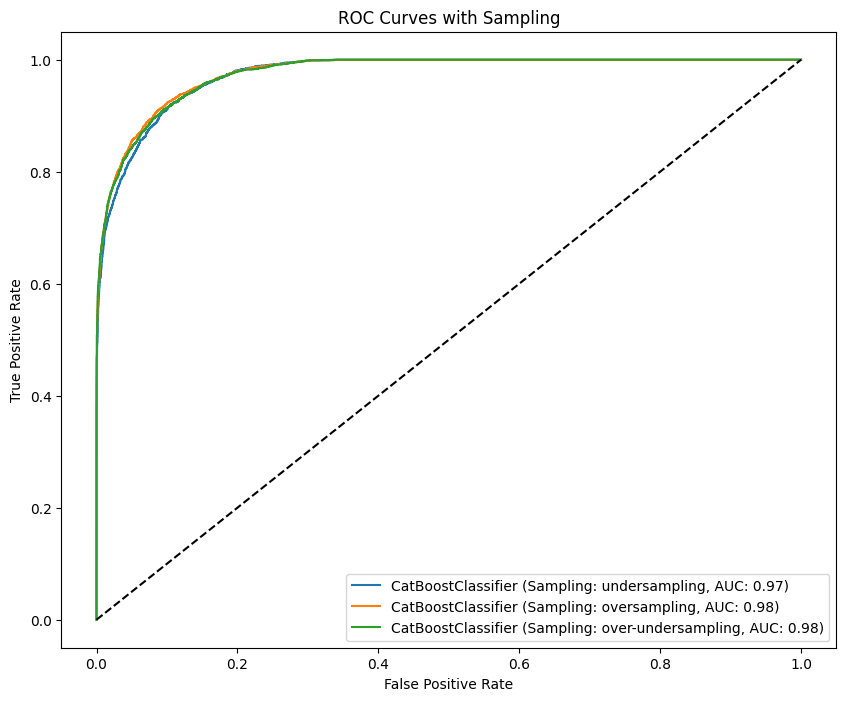

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
import matplotlib.pyplot as plt


# Encoding kolom-kolom yang berisi string ke format numerik
le = LabelEncoder()

# Kolom yang perlu di-encode
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

for col in categorical_columns:
    loan[col] = le.fit_transform(loan[col])

# Kolom 'previous_loan_defaults_on_file' juga perlu di-encode
loan['previous_loan_defaults_on_file'] = le.fit_transform(loan['previous_loan_defaults_on_file'])

# Periksa tipe data setelah encoding
print(loan.dtypes)

# Pisahkan fitur X dan target y
X = loan[['person_education', 'person_income', 'person_home_ownership', 'loan_amnt',
          'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
          'credit_score', 'previous_loan_defaults_on_file', 'person_gender']]

# Scaling data fitur numerik
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Target variabel y (status pinjaman)
y = loan['loan_status']

# Encoding target variabel jika diperlukan
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Split dataset untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handling imbalance and evaluating models
def evaluate_with_sampling(model, X_train, y_train, X_test, y_test, sampling_method):
    # Apply sampling
    if sampling_method == 'undersampling':
        sampler = RandomUnderSampler(random_state=42)
    elif sampling_method == 'oversampling':
        sampler = RandomOverSampler(random_state=42)
    elif sampling_method == 'over-undersampling':
        sampler = SMOTE(random_state=42)
    else:
        raise ValueError("Invalid sampling method")

    X_train_sample, y_train_sample = sampler.fit_resample(X_train, y_train)

    # Train model
    model.fit(X_train_sample, y_train_sample)
    y_train_pred = model.predict(X_train_sample)
    y_test_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__} | Sampling: {sampling_method}")
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_sample, y_train_pred))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))

    train_auc = roc_auc_score(y_train_sample, model.predict_proba(X_train_sample)[:, 1]) if hasattr(model, 'predict_proba') else None
    test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, 'predict_proba') else None

    train_accuracy = accuracy_score(y_train_sample, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train_sample, y_train_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    train_recall = recall_score(y_train_sample, y_train_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    train_f1 = f1_score(y_train_sample, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Train Precision: {train_precision}")
    print(f"Test Precision: {test_precision}")
    print(f"Train Recall: {train_recall}")
    print(f"Test Recall: {test_recall}")
    print(f"Train F1 Score: {train_f1}")
    print(f"Test F1 Score: {test_f1}")
    print(f"Train ROC-AUC: {train_auc}")
    print(f"Test ROC-AUC: {test_auc}")
    print("\n")

    # Plot ROC Curve
    if hasattr(model, 'predict_proba'):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (Sampling: {sampling_method}, AUC: {test_auc:.2f})")

# CatBoostClassifier
plt.figure(figsize=(10, 8))
sampling_methods = ['undersampling', 'oversampling', 'over-undersampling']

for sampling in sampling_methods:
    evaluate_with_sampling(CatBoostClassifier(verbose=0), X_train, y_train, X_test, y_test, sampling)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves with Sampling")
plt.legend(loc="best")
plt.show()

# **Feature Importance**

In [ ]:
!pip install dalex

In [ ]:
import pandas as pd

# Misalkan 'X_train' adalah numpy.ndarray dan 'feature_names' adalah daftar nama fitur
feature_names = ['person_gender', 'person_education', 'person_income', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
                 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']

# Convert X_train ke pandas DataFrame dengan nama kolom yang sesuai
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Inisialisasi explainer untuk model CatBoostClassifier dengan X_train_df
catboost_exp = dx.Explainer(catboost_clf, X_train_df, y_train, label="CatBoostClassifier Interpretation")

# Plot bagian model
catboost_exp.model_parts().plot()

Preparation of a new explainer is initiated

  -> data              : 31500 rows 11 cols
  -> target variable   : 31500 values
  -> model_class       : catboost.core.CatBoostClassifier (default)
  -> label             : CatBoostClassifier Interpretation
  -> predict function  : <function yhat_proba_default at 0x7bd8052e8d30> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 3.55e-08, mean = 0.222, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.897, mean = 1.64e-05, max = 0.976
  -> model_info        : package catboost

A new explainer has been created!


previous_loan_defaults memiliki pengaruh yang cukup besar untuk mempengaruhi approval pinjaman